<a href="https://colab.research.google.com/github/Poulasti2002pb/newPro/blob/main/Customer_service_request.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
df=pd.read_csv('/content/311 service request.csv')

In [4]:
df.shape

(25012, 53)

In [5]:
df.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                         144
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                          374
Location Type                         0
Incident Zip                        160
Incident Address                   2925
Street Name                        2925
Cross Street 1                     3303
Cross Street 2                     3338
Intersection Street 1             22107
Intersection Street 2             22144
Address Type                        177
City                                160
Landmark                          24997
Facility Type                       140
Status                                0
Due Date                              0
Resolution Description                0
Resolution Action Updated Date      140
Community Board                       1
Borough                               1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25012 entries, 0 to 25011
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      25012 non-null  int64  
 1   Created Date                    25012 non-null  object 
 2   Closed Date                     24868 non-null  object 
 3   Agency                          25012 non-null  object 
 4   Agency Name                     25012 non-null  object 
 5   Complaint Type                  25012 non-null  object 
 6   Descriptor                      24638 non-null  object 
 7   Location Type                   25012 non-null  object 
 8   Incident Zip                    24852 non-null  float64
 9   Incident Address                22087 non-null  object 
 10  Street Name                     22087 non-null  object 
 11  Cross Street 1                  21709 non-null  object 
 12  Cross Street 2                  

In [ ]:
#Droppin unnecesary columns


In [12]:
df1=df.drop(['Agency Name','Agency','Location Type','Intersection Street 1','Intersection Street 2','Address Type','Landmark','Facility Type','Status','Resolution Description', 'School Name','School Number','School Region','School Code'], axis=1)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25012 entries, 0 to 25011
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      25012 non-null  int64  
 1   Created Date                    25012 non-null  object 
 2   Closed Date                     24868 non-null  object 
 3   Complaint Type                  25012 non-null  object 
 4   Descriptor                      24638 non-null  object 
 5   Incident Zip                    24852 non-null  float64
 6   Incident Address                22087 non-null  object 
 7   Street Name                     22087 non-null  object 
 8   Cross Street 1                  21709 non-null  object 
 9   Cross Street 2                  21674 non-null  object 
 10  City                            24852 non-null  object 
 11  Due Date                        25012 non-null  object 
 12  Resolution Action Updated Date  

In [14]:
df1=df1.drop(['Street Name','Incident Address','Cross Street 1','Cross Street 2','Descriptor','Y Coordinate (State Plane)','X Coordinate (State Plane)','Park Facility Name','Location','School Phone Number','School Address','School City','School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name'], axis=1)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25012 entries, 0 to 25011
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      25012 non-null  int64  
 1   Created Date                    25012 non-null  object 
 2   Closed Date                     24868 non-null  object 
 3   Complaint Type                  25012 non-null  object 
 4   Incident Zip                    24852 non-null  float64
 5   City                            24852 non-null  object 
 6   Due Date                        25012 non-null  object 
 7   Resolution Action Updated Date  24872 non-null  object 
 8   Community Board                 25011 non-null  object 
 9   Borough                         25011 non-null  object 
 10  Park Borough                    25011 non-null  object 
 11  Latitude                        24804 non-null  float64
 12  Longitude                       

In [16]:
df1.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Incident Zip,City,Due Date,Resolution Action Updated Date,Community Board,Borough,Park Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-2016 00:55,Noise - Street/Sidewalk,10034.0,NEW YORK,01-01-2016 07:59,01-01-2016 00:55,12 MANHATTAN,MANHATTAN,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-2016 01:26,Blocked Driveway,11105.0,ASTORIA,01-01-2016 07:59,01-01-2016 01:26,01 QUEENS,QUEENS,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-2016 04:51,Blocked Driveway,10458.0,BRONX,01-01-2016 07:59,01-01-2016 04:51,07 BRONX,BRONX,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-2016 07:43,Illegal Parking,10461.0,BRONX,01-01-2016 07:57,01-01-2016 07:43,10 BRONX,BRONX,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-2016 03:24,Illegal Parking,11373.0,ELMHURST,01-01-2016 07:56,01-01-2016 03:24,04 QUEENS,QUEENS,QUEENS,40.733060,-73.874170


In [17]:
#Analyze data types for each column

In [18]:
df1.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Complaint Type                     object
Incident Zip                      float64
City                               object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                            object
Park Borough                       object
Latitude                          float64
Longitude                         float64
dtype: object

In [19]:
#finding column with missing value

In [22]:
df1.isnull().sum()

Unique Key                          0
Created Date                        0
Closed Date                       144
Complaint Type                      0
Incident Zip                      160
City                              160
Due Date                            0
Resolution Action Updated Date    140
Community Board                     1
Borough                             1
Park Borough                        1
Latitude                          208
Longitude                         208
dtype: int64

In [23]:
df1["Closed Date"].describe()

count                24868
unique               20882
top       12-08-2015 07:44
freq                    18
Name: Closed Date, dtype: object

In [24]:
#missin value treatment
#to know the unique value in this col


In [25]:
df1["City"].nunique()

47

In [26]:
df1["City"].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT'], dtype=object)

In [27]:
df1["City"].mode()

0    BROOKLYN
Name: City, dtype: object

In [28]:
df1["City"]=df1["City"].fillna(df1["City"].mode()[0])

In [29]:
df1.isnull().sum()

Unique Key                          0
Created Date                        0
Closed Date                       144
Complaint Type                      0
Incident Zip                      160
City                                0
Due Date                            0
Resolution Action Updated Date    140
Community Board                     1
Borough                             1
Park Borough                        1
Latitude                          208
Longitude                         208
dtype: int64

In [30]:
df1.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Incident Zip,City,Due Date,Resolution Action Updated Date,Community Board,Borough,Park Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-2016 00:55,Noise - Street/Sidewalk,10034.0,NEW YORK,01-01-2016 07:59,01-01-2016 00:55,12 MANHATTAN,MANHATTAN,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-2016 01:26,Blocked Driveway,11105.0,ASTORIA,01-01-2016 07:59,01-01-2016 01:26,01 QUEENS,QUEENS,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-2016 04:51,Blocked Driveway,10458.0,BRONX,01-01-2016 07:59,01-01-2016 04:51,07 BRONX,BRONX,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-2016 07:43,Illegal Parking,10461.0,BRONX,01-01-2016 07:57,01-01-2016 07:43,10 BRONX,BRONX,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-2016 03:24,Illegal Parking,11373.0,ELMHURST,01-01-2016 07:56,01-01-2016 03:24,04 QUEENS,QUEENS,QUEENS,40.733060,-73.874170


In [34]:
# Change date columns to YYYY-MM-DD format
df1['Created Date'] = pd.to_datetime(df1['Created Date'])
df1['Closed Date'] = pd.to_datetime(df1['Closed Date'])

In [35]:
#Check whether the date are in the correct order
df1.loc[df1['Created Date']>=df1['Closed Date']].shape

(24868, 13)

In [36]:
# Drop rows where 'Closed Date' is empty
df1 = df1[df1['Closed Date'].notnull()]

In [37]:
# Calculate resolution time in terms of days
df1['Resolution Time'] = (df1['Closed Date'] - df1['Created Date']).dt.days
df1.head()

<ipython-input-37-4dc476d73a6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Resolution Time'] = (df1['Closed Date'] - df1['Created Date']).dt.days


,Unique Key,Created Date,Closed Date,Complaint Type,Incident Zip,City,Due Date,Resolution Action Updated Date,Community Board,Borough,Park Borough,Latitude,Longitude,Resolution Time
0,32310363,2016-01-01 00:55:00,2016-01-01 00:55:00,Noise - Street/Sidewalk,10034.0,NEW YORK,01-01-2016 07:59,01-01-2016 00:55,12 MANHATTAN,MANHATTAN,MANHATTAN,40.865682,-73.923501,0
1,32309934,2016-01-01 01:26:00,2016-01-01 01:26:00,Blocked Driveway,11105.0,ASTORIA,01-01-2016 07:59,01-01-2016 01:26,01 QUEENS,QUEENS,QUEENS,40.775945,-73.915094,0
2,32309159,2016-01-01 04:51:00,2016-01-01 04:51:00,Blocked Driveway,10458.0,BRONX,01-01-2016 07:59,01-01-2016 04:51,07 BRONX,BRONX,BRONX,40.870325,-73.888525,0
3,32305098,2016-01-01 07:43:00,2016-01-01 07:43:00,Illegal Parking,10461.0,BRONX,01-01-2016 07:57,01-01-2016 07:43,10 BRONX,BRONX,BRONX,40.835994,-73.828379,0
4,32306529,2016-01-01 03:24:00,2016-01-01 03:24:00,Illegal Parking,11373.0,ELMHURST,01-01-2016 07:56,01-01-2016 03:24,04 QUEENS,QUEENS,QUEENS,40.733060,-73.874170,0


In [38]:
# Resolution time according to complaint type
df1.groupby('Complaint Type')['Resolution Time'].mean().sort_values()

Complaint Type
Animal Abuse                 0.0
Traffic                      0.0
Posting Advertisement        0.0
Panhandling                  0.0
Noise - Vehicle              0.0
Noise - Street/Sidewalk      0.0
Noise - Park                 0.0
Noise - House of Worship     0.0
Noise - Commercial           0.0
Illegal Parking              0.0
Illegal Fireworks            0.0
Homeless Encampment          0.0
Graffiti                     0.0
Drinking                     0.0
Disorderly Youth             0.0
Derelict Vehicle             0.0
Blocked Driveway             0.0
Bike/Roller/Skate Chronic    0.0
Urinating in Public          0.0
Vending                      0.0
Name: Resolution Time, dtype: float64

In [39]:
# Count complaint types by city.
df2=df1.groupby(['City', 'Complaint Type']).size()
print(df2)

City      Complaint Type         
ARVERNE   Animal Abuse                4
          Blocked Driveway            3
          Derelict Vehicle            6
          Illegal Parking             5
          Noise - Commercial          1
                                     ..
WOODSIDE  Noise - Street/Sidewalk    10
          Noise - Vehicle             7
          Traffic                     1
          Urinating in Public         1
          Vending                     1
Length: 414, dtype: int64


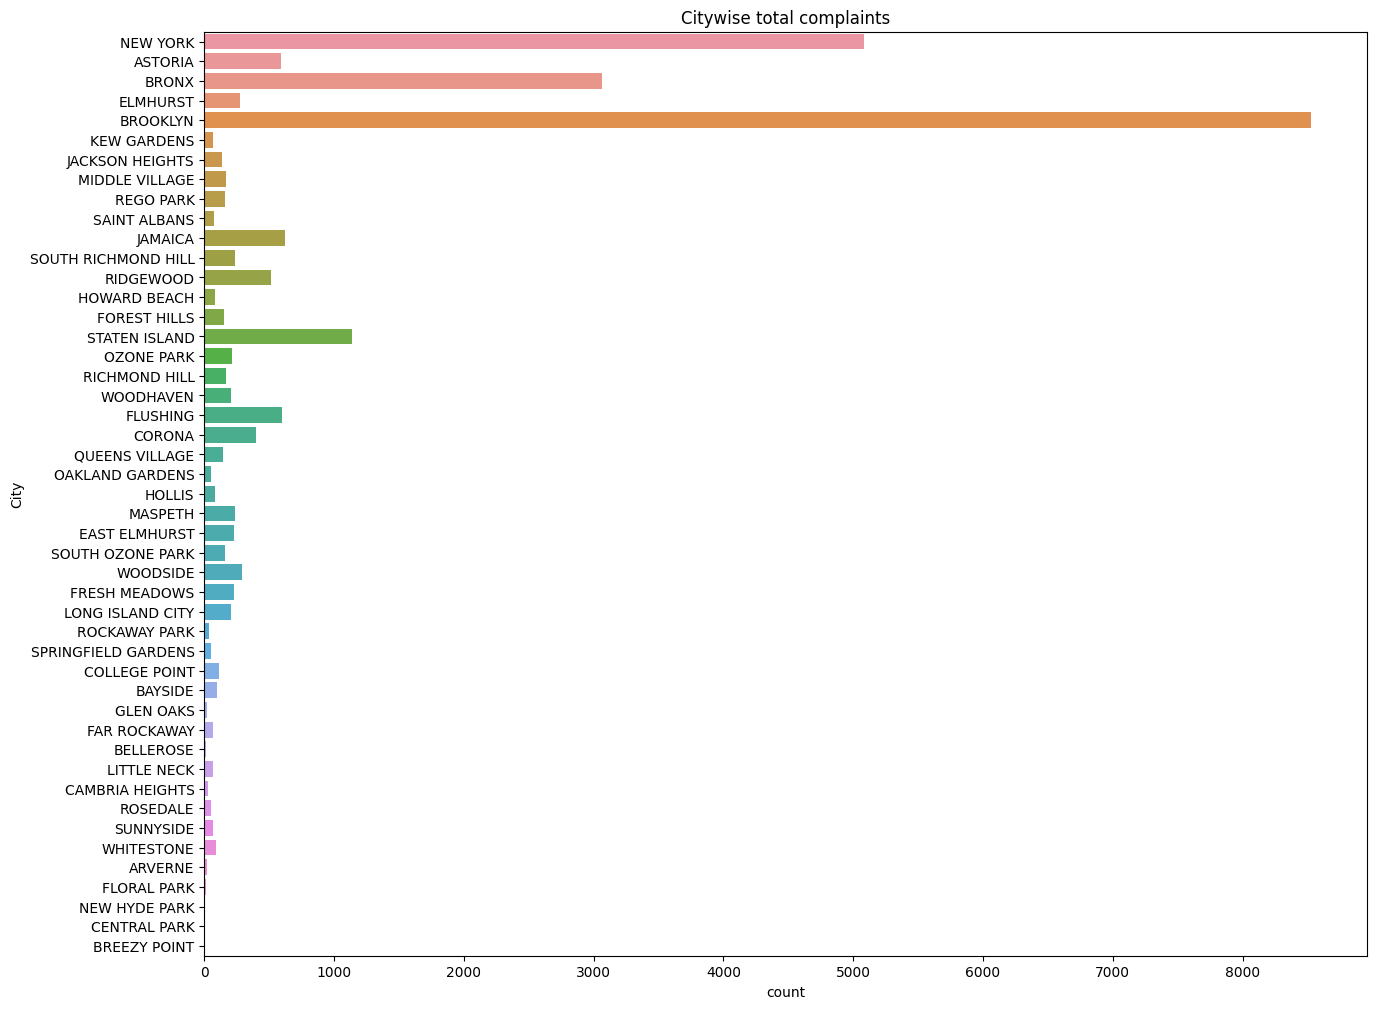

In [40]:
# Display frequency of overall complaint types city wise
#df2.value_counts().plot(kind = 'bar', title = 'Overall Complaint Type Frequency city wise')
plt.figure(figsize=(15,12))
plt.title('Citywise total complaints')
sns.countplot(y='City',data=df1)
plt.show()

In [41]:
df_Brooklyn = df1[df1['City']=='BROOKLYN']

<Axes: title={'center': 'Complaints Concentration in Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

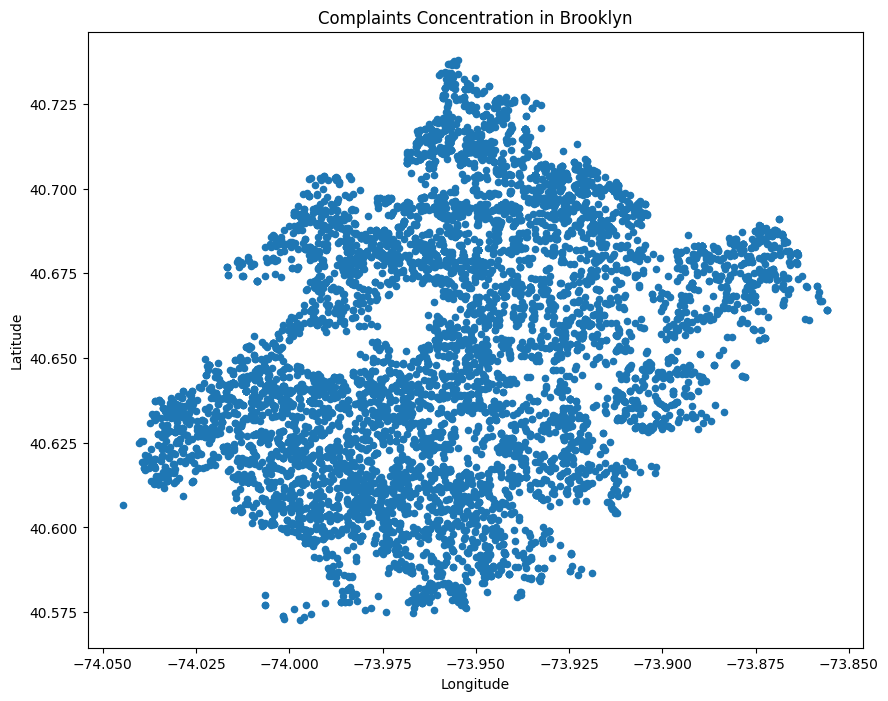

In [42]:
# scatter plot for complaint concentration across Brooklyn
df_Brooklyn[['Longitude', 'Latitude']].plot(kind = 'scatter', x='Longitude', y='Latitude', title = 'Complaints Concentration in Brooklyn', figsize = (10, 8))

<Axes: title={'center': 'Complaints Concentration in Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

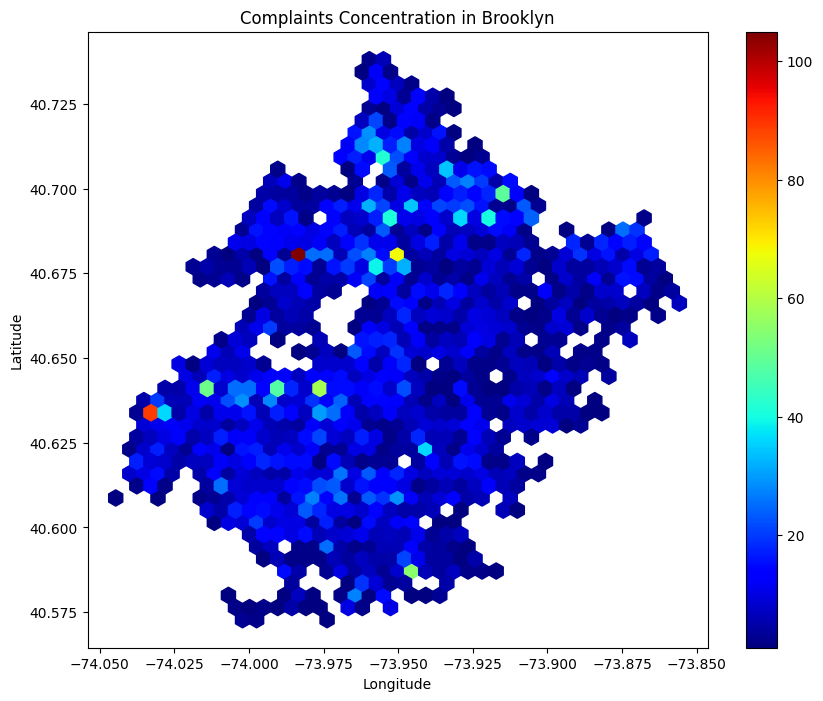

In [43]:
# Draw hexbin plot for complaint concentration across Brooklyn
df_Brooklyn[['Longitude', 'Latitude']].plot(kind = 'hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet', mincnt=1, title = 'Complaints Concentration in Brooklyn', figsize = (10, 8))

<Axes: title={'center': 'Overall Complaint Type Frequency'}>

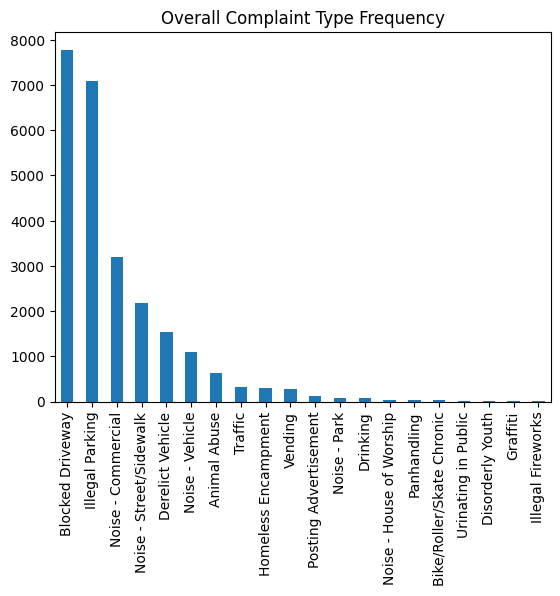

In [44]:
# Display frequency of overall complaint types
df1['Complaint Type'].value_counts().plot(kind = 'bar', title = 'Overall Complaint Type Frequency')

<Axes: title={'center': 'Overall Complaint Type Frequency'}>

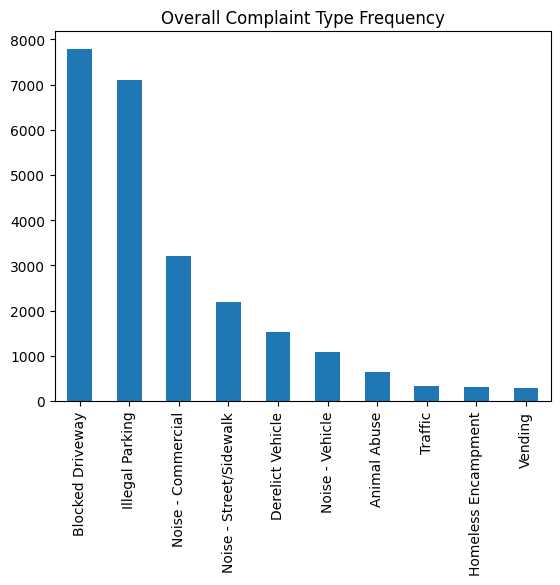

In [45]:
# Qtn 3.2 Display frequency of top 10 overall complaint types
df1['Complaint Type'].value_counts().head(10).plot(kind = 'bar', title = 'Overall Complaint Type Frequency')

In [46]:
# Count complaint types by city.
df2=df1.groupby(['City', 'Complaint Type']).size()
print(df2)

City      Complaint Type         
ARVERNE   Animal Abuse                4
          Blocked Driveway            3
          Derelict Vehicle            6
          Illegal Parking             5
          Noise - Commercial          1
                                     ..
WOODSIDE  Noise - Street/Sidewalk    10
          Noise - Vehicle             7
          Traffic                     1
          Urinating in Public         1
          Vending                     1
Length: 414, dtype: int64


In [47]:
df3=df1.groupby(['City'])
df3['Complaint Type'].value_counts().head(10)

City     Complaint Type         
ARVERNE  Derelict Vehicle             6
         Illegal Parking              5
         Animal Abuse                 4
         Blocked Driveway             3
         Noise - Commercial           1
ASTORIA  Blocked Driveway           263
         Illegal Parking            144
         Noise - Commercial          93
         Noise - Street/Sidewalk     26
         Derelict Vehicle            25
Name: Complaint Type, dtype: int64

<Axes: xlabel='City,Complaint Type'>

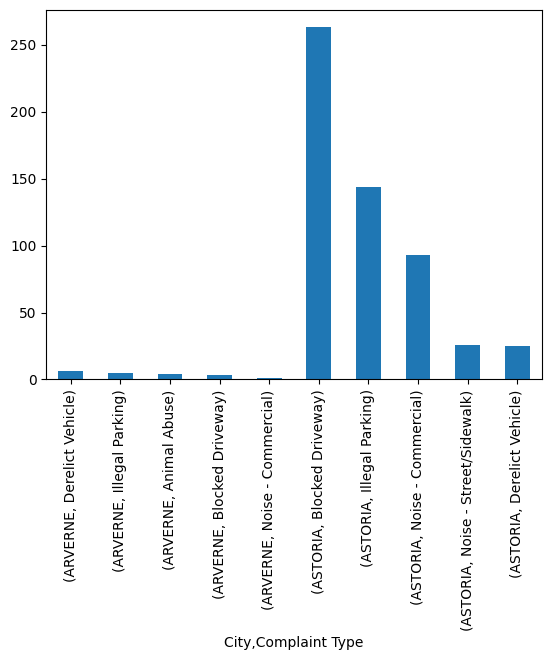

In [48]:
df3['Complaint Type'].value_counts().head(10).plot(kind='bar')

In [49]:
df_avg_ResponseTime=df1.groupby('Complaint Type')['Resolution Time'].mean().sort_values(ascending=True)
df_avg_ResponseTime

Complaint Type
Animal Abuse                 0.0
Traffic                      0.0
Posting Advertisement        0.0
Panhandling                  0.0
Noise - Vehicle              0.0
Noise - Street/Sidewalk      0.0
Noise - Park                 0.0
Noise - House of Worship     0.0
Noise - Commercial           0.0
Illegal Parking              0.0
Illegal Fireworks            0.0
Homeless Encampment          0.0
Graffiti                     0.0
Drinking                     0.0
Disorderly Youth             0.0
Derelict Vehicle             0.0
Blocked Driveway             0.0
Bike/Roller/Skate Chronic    0.0
Urinating in Public          0.0
Vending                      0.0
Name: Resolution Time, dtype: float64